<a href="https://colab.research.google.com/github/Mason1217/PyTorch-Practice/blob/master/extras/exercises/03_pytorch_computer_vision_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03. PyTorch Computer Vision Exercises

The following is a collection of exercises based on computer vision fundamentals in PyTorch.

They're a bunch of fun.

You're going to get to write plenty of code!

## Resources

1. These exercises are based on [notebook 03 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/03_pytorch_computer_vision/).
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/_PibmqpEyhA).
  * **Note:** Going through these exercises took me just over 3 hours of solid coding, so you should expect around the same.
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [1]:
# Check for GPU
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [2]:
# Import torch
import torch

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# TODO: Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"

2.5.1+cu124


## 1. What are 3 areas in industry where computer vision is currently being used?

https://builtin.com/machine-learning/computer-vision

* OCR (Optical Character Recognition), e.g. Google translation
* Object recognition in transportation industry
* Medical industry

## 2. Search "what is overfitting in machine learning" and write down a sentence about what you find.

https://www.ibm.com/think/topics/overfitting

When model learned "noise" in training data, may be too close to training data, and performing badly in test data or unseen data in the future.

## 3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each.
> **Note:** there are lots of these, so don't worry too much about all of them, just pick 3 and start with those.

* Early stopping
* Give model more "clean" data when training
* Regularization (filtering good features)

## 4. Spend 20-minutes reading and clicking through the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).

* Upload your own example image using the "upload" button on the website and see what happens in each layer of a CNN as your image passes through it.

## 5. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.

In [3]:
import torchvision
from torchvision import datasets

train_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=torchvision.transforms.ToTensor(),
    target_transform=None
)
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=torchvision.transforms.ToTensor(),
    target_transform=None
)

image, label = next(iter(train_data))
class_names = train_data.classes
print(f"Image shape: {image.shape}")
print(f"Label: {label}")
print(f"Class names:\n{class_names}")

100%|██████████| 26.4M/26.4M [00:04<00:00, 6.33MB/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 140kB/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:01<00:00, 2.59MB/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 9.08MB/s]


Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw

Image shape: torch.Size([1, 28, 28])
Label: 9
Class names:
['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


## 6. Visualize at least 5 different samples of the MNIST training dataset.

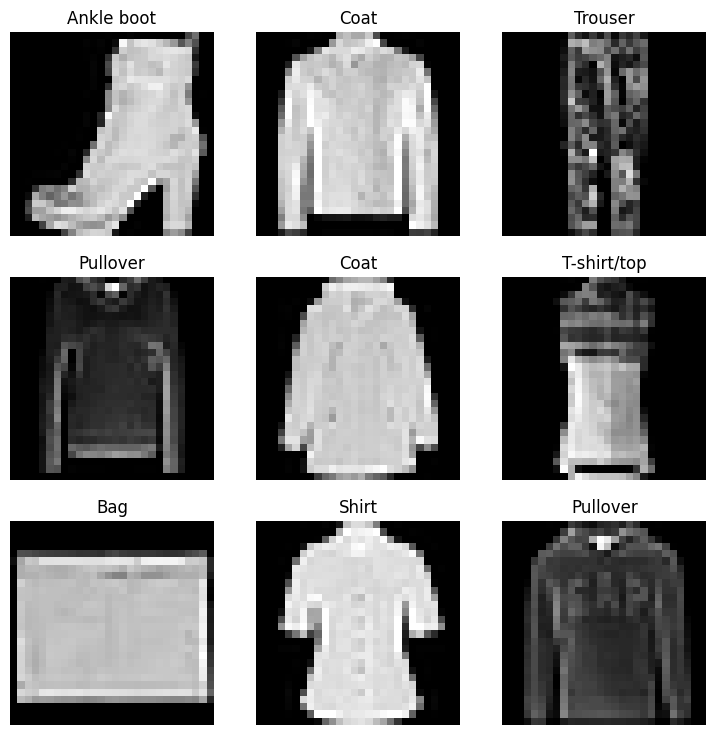

In [4]:
import torch
import random
from matplotlib import pyplot as plt

torch.manual_seed(42)
nrows, ncols = 3, 3

fig = plt.figure(figsize=(9, 9))
for i in range(1, nrows * ncols + 1):
    random_idx = random.randint(0, len(train_data))
    image, label = train_data[random_idx]
    plt.subplot(nrows, ncols, i)
    plt.imshow(image.squeeze(), cmap="gray")
    plt.title(class_names[label])
    plt.axis(False)

## 7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

In [5]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32

train_dataloader = DataLoader(
    dataset=train_data,
    batch_size=BATCH_SIZE,
    shuffle=True
)

test_dataloader = DataLoader(
    dataset=test_data,
    batch_size=BATCH_SIZE,
    shuffle=False
)

## 8. Recreate `model_2` used in notebook 03 (the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/), also known as TinyVGG) capable of fitting on the MNIST dataset.

In [6]:
import torch
from torch import nn

torch.manual_seed(42)

class TinyVGG(nn.Module):
    def __init__(
            self,
            input_shape: int,
            output_shape: int,
            hidden_units: int = 8,
    ):
        super().__init__()
        self.cnn_block_1 = nn.Sequential(
            nn.Conv2d(
                in_channels=input_shape,
                out_channels=hidden_units,
                kernel_size=3,
                stride=1,
                padding=0
            ),
            nn.ReLU(),
            nn.Conv2d(
                in_channels=hidden_units,
                out_channels=hidden_units,
                kernel_size=3,
                stride=1,
                padding=0
            ),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.cnn_block_2 = nn.Sequential(
            nn.Conv2d(
                in_channels=hidden_units,
                out_channels=hidden_units,
                kernel_size=3,
                stride=1,
                padding=0
            ),
            nn.ReLU(),
            nn.Conv2d(
                in_channels=hidden_units,
                out_channels=hidden_units,
                kernel_size=3,
                stride=1,
                padding=0
            ),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(
                in_features=hidden_units*4*4,
                out_features=output_shape
            )
        )
    def forward(self, x):
        x = self.cnn_block_1(x)
        # print(f"Shape of x after cnn_1: {x.shape}")
        x = self.cnn_block_2(x)
        # print(f"Shape of x after cnn_2: {x.shape}")
        x = self.classifier(x)
        return x

model_0 = TinyVGG(
    input_shape=1,
    output_shape=len(class_names),
    hidden_units=16
)

In [7]:
# track shape of outputs of each layers
for batch, (X, y) in enumerate(train_dataloader):
    print(f"Batch: {batch}")
    print(f"Shape of X: {X.shape}")
    print(f"Shape of y: {y.shape}")
    break

y_logits = model_0(X)
print(f"Shape of y_logits: {y_logits.shape}")

Batch: 0
Shape of X: torch.Size([32, 1, 28, 28])
Shape of y: torch.Size([32])
Shape of y_logits: torch.Size([32, 10])


## 9. Train the model you built in exercise 8. for 5 epochs on CPU and GPU and see how long it takes on each.

In [15]:
from timeit import default_timer as timer
def print_train_time(
        start: float,
        end: float,
        device: torch.device = None
):
    total_time = end - start
    print(f"Train time on {device}: {total_time:.5f} seconds")
    return total_time

In [8]:
def train_step(
        model: torch.nn.Module,
        dataloader: torch.utils.data.DataLoader,
        loss_fn: torch.nn.Module,
        accuracy_fn,
        optimizer: torch.optim.Optimizer,
        device: torch.device = device
):
    model.train()
    model.to(device)
    train_loss = 0
    train_acc = 0

    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)
        # Forward pass
        y_logits = model(X)

        # Calculate loss and acc
        loss = loss_fn(y_logits, y)
        train_loss += loss
        train_acc += accuracy_fn(
            y_true=y,
            y_pred=y_logits.argmax(dim=1)
        )

        # Optimizer zero grad
        optimizer.zero_grad()

        # Loss backward
        loss.backward()

        # Optimizer step
        optimizer.step()

    train_loss /= len(dataloader) # Calculate loss per batch
    train_acc /= len(dataloader) # Calculate acc per batch
    print(f"Train loss: {train_loss:.4f} | Train acc: {train_acc:.2f}%")

In [14]:
print(type(test_dataloader))

X, y = next(iter(test_dataloader))
print(X.shape)
print(y.shape)

<class 'torch.utils.data.dataloader.DataLoader'>
torch.Size([32, 1, 28, 28])
torch.Size([32])


In [10]:
def test_step(
        model: torch.nn.Module,
        dataloader: torch.utils.data.DataLoader,
        loss_fn: torch.nn.Module,
        accuracy_fn,
        device: torch.device
):
    model.eval()
    model.to(device)

    test_loss = 0
    test_acc = 0

    with torch.inference_mode():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            # Forward pass
            test_logits = model(X)

            # Calculate loss and acc
            test_loss += loss_fn(test_logits, y)
            test_acc += accuracy_fn(
                y_true=y,
                y_pred=test_logits.argmax(dim=1)
            )
        test_loss /= len(dataloader) # Calculate loss per batch
        test_acc /= len(dataloader) # Calculate acc per batch
        print(f"Test loss: {test_loss:.4f} | Test acc: {test_acc:.2f}%")


In [11]:
# Download helper functions from github
import requests
from pathlib import Path

# Download helper functions from learn PyTorch repo
if Path("helper_functions.py").is_file():
    print(f"helper_function.py already exists, skipping download...")
else:
    print(f"Downloading hepler_functions.py")
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py")
    with open("helper_functions.py", "wb") as f:
        f.write(request.content)

In [12]:
from helper_functions import accuracy_fn

loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(
    params=model_0.parameters(),
    lr=0.1
)

In [13]:
from tqdm.auto import tqdm

torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 5

train_start_on = timer()
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}")
    train_step(
        model=model_0,
        dataloader=train_dataloader,
        loss_fn=loss_fn,
        accuracy_fn=accuracy_fn,
        optimizer=optimizer,
        device=device
    )
    test_step(
        model=model_0,
        dataloader=test_dataloader,
        loss_fn=loss_fn,
        accuracy_fn=accuracy_fn,
        device=device
    )
# Print training time
train_end_on = timer()
print_train_time(
    start=train_start_on,
    end=train_end_on,
    device=device
)

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0
Train loss: 0.6405 | Train acc: 76.38%
Test loss: 0.4528 | Test acc: 83.73%
Epoch: 1
Train loss: 0.3989 | Train acc: 85.39%
Test loss: 0.3917 | Test acc: 85.87%
Epoch: 2
Train loss: 0.3537 | Train acc: 87.08%
Test loss: 0.3513 | Test acc: 87.54%
Epoch: 3
Train loss: 0.3299 | Train acc: 87.86%
Test loss: 0.3330 | Test acc: 87.91%
Epoch: 4
Train loss: 0.3129 | Train acc: 88.60%
Test loss: 0.3423 | Test acc: 87.53%


## 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

In [61]:
def eval_model(
        model: torch.nn.Module,
        dataloader: torch.utils.data.DataLoader,
        loss_fn: torch.nn.Module,
        accuracy_fn,
        device: torch.device = "cpu"
) -> dict:
    model.eval()
    model.to(device)

    pred_list = []
    loss = 0
    acc = 0

    with torch.inference_mode():
        for X, y in tqdm(dataloader):
            # Send data to target device
            X, y = X.to(device), y.to(device)

            # Forward pass
            y_logits = model(X)
            y_pred = y_logits.argmax(dim=1)

            # Calculate loss and acc
            loss += loss_fn(y_logits, y)
            acc += accuracy_fn(
                y_true=y,
                y_pred=y_pred
            )
            # Add pred into pred_list
            pred_list.append(y_pred.cpu())

        loss /= len(dataloader)
        acc /= len(dataloader)
        y_pred_tensor = torch.cat(pred_list)

    results = {
        "model_name": model.__class__.__name__,
        "model_loss": loss.item(),
        "model_acc": acc,
        "model_preds": y_pred_tensor
    }
    return results

In [62]:
model_0_results = eval_model(
    model=model_0,
    dataloader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn,
    device=device
)
model_0_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'TinyVGG',
 'model_loss': 0.3422900438308716,
 'model_acc': 87.52995207667732,
 'model_preds': tensor([9, 2, 1,  ..., 8, 1, 5])}

In [54]:
from matplotlib import pyplot as plt
import random
def plot_pred_results(
            model: torch.nn.Module,
            dataset,
            class_names,
            nrows: int = 4,
            ncols: int = 4
):
    fig = plt.figure(figsize=(9, 9))
    for i in range(1, nrows * ncols + 1):
        random_idx = random.randint(0, len(dataset))
        img, label = dataset[random_idx]

        model.eval()
        with torch.inference_mode():
            y_pred = model(img.unsqueeze(dim=0)).argmax(dim=1).item()

        plt.subplot(nrows, ncols, i)
        plt.imshow(img.squeeze(), cmap="gray")

        title_text = f"Pred: {class_names[y_pred]} | True: {class_names[label]}"
        if y_pred == label:
            plt.title(title_text, fontsize=8, c="g")
        else:
            plt.title(title_text, fontsize=8, c="r")
        plt.axis(False)


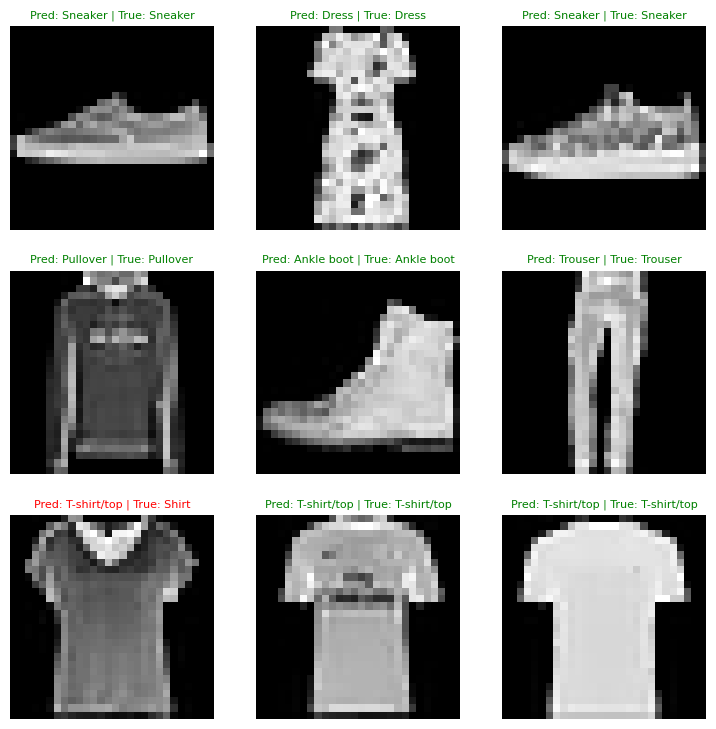

In [60]:
plot_pred_results(
    model=model_0,
    dataset=test_data,
    class_names=class_names,
    nrows=3,
    ncols=3
)

## 11. Plot a confusion matrix comparing your model's predictions to the truth labels.

In [63]:
try:
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")
    assert int(mlxtend.__version__.split(".")[1]) >= 19
except:
    !pip install torchmetrics -U mlxtend
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 927.3/927.3 kB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 18.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 16.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 16.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 738.3 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 30.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninsta

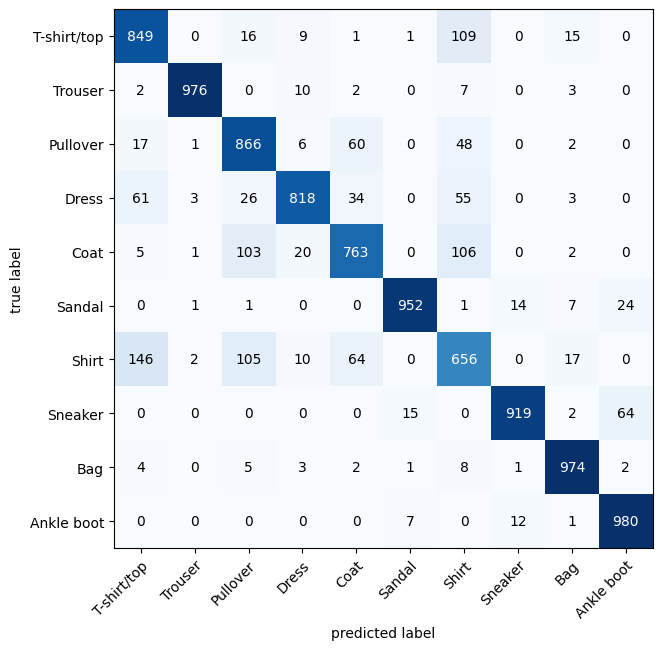

In [66]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

confmat = ConfusionMatrix(
    num_classes=len(class_names),
    task="multiclass"
)
confusion_tensor = confmat(
    preds=model_0_results["model_preds"],
    target=test_data.targets
)

fig, ax = plot_confusion_matrix(
    conf_mat=confusion_tensor.numpy(),
    class_names=class_names,
    figsize=(10, 7)
)

## 12. Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d()` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the `kernel_size` parameter goes up and down?

## 13. Use a model similar to the trained `model_2` from notebook 03 to make predictions on the test [`torchvision.datasets.FashionMNIST`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html) dataset.
* Then plot some predictions where the model was wrong alongside what the label of the image should've been.
* After visualing these predictions do you think it's more of a modelling error or a data error?
* As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?